**Mobina Salimipanah - 99109788**

# **Introduction**

In this assignment, you will work with a dataset that includes The Boston housing data was collected in 1978 and each of the 506 entries represent aggregated data about 14 features for homes from various suburbs in Boston, Massachusetts. The target variable of interest in this dataset is the median value of owner-occupied homes (MEDV), which serves as a proxy for the house prices.
First, you will start by fitting a basic regression model using scikit-learn (sklearn) to establish a baseline for comparison. This basic regression model will serve as a reference point for evaluating the performance of more sophisticated models incorporating regularization techniques.

Furthermore, you will apply L1 (Lasso) and L2 (Ridge) regularization techniques to refine your predictions and evaluate the impact of these methods on the accuracy of your results. Regularization is a technique used to prevent overfitting by adding a penalty term to the loss function, encouraging simpler models with smaller coefficients. L1 regularization (Lasso) encourages sparsity by penalizing the absolute values of coefficients, while L2 regularization (Ridge) penalizes the square of coefficients. By incorporating these regularization techniques, you aim to improve the generalization performance of your regression models and obtain more robust predictions of house prices in the Boston area.

## Imports

In [1]:
import os
import pandas
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
import numpy as np
import pandas as pd
import seaborn as sns
from joblib import dump, load
from matplotlib import pyplot as plt

!wget -O /HousingData.csv "https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0"

--2024-04-12 09:24:24--  https://www.dropbox.com/scl/fi/j3rxgrd8l7fgczzhiedlp/new.csv?rlkey=yngaf57gumhtmm3hxffk20qll&dl=0
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://uc7e9cb4a1a27b50d40f57b82d40.dl.dropboxusercontent.com/cd/0/inline/CQ0oL6UKj0tP86SifU8miruZksi4mR0oKcxjZWu98N3Q8jnmFQbfRtAhd3WFTV1MtcdgnvRAy77I_LCRe12D86ABQzKEfTqy-r23YTID32FJIuAkQfeZdo7NFnFplIl6jY6Xq9AW7VuZk6aY5dbEam5u/file# [following]
--2024-04-12 09:24:24--  https://uc7e9cb4a1a27b50d40f57b82d40.dl.dropboxusercontent.com/cd/0/inline/CQ0oL6UKj0tP86SifU8miruZksi4mR0oKcxjZWu98N3Q8jnmFQbfRtAhd3WFTV1MtcdgnvRAy77I_LCRe12D86ABQzKEfTqy-r23YTID32FJIuAkQfeZdo7NFnFplIl6jY6Xq9AW7VuZk6aY5dbEam5u/file
Resolving uc7e9cb4a1a27b50d40f57b82d40.dl.dropboxusercontent.com (uc7e9cb4a1a27b50d40f57b82d40.dl.dropboxusercontent.com)... 162.125.1.15, 2620:1

# Load and Explore

Load the dataset (as a dataframe) using pandas and display the top 5 rows of the dataframe and then check for missing values and impute missing values with mean

In [35]:
file_path = '/HousingData.csv'
data = pd.read_csv(file_path)

print(data.head())
print("Before Imputation:" ,"\n", data.isnull().sum())
data = data.fillna(data.mean())
print("After Imputation:",'\n', data.isnull().sum())

      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  TAX  PTRATIO  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  296     15.3   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  242     17.8   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  242     17.8   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  222     18.7   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  222     18.7   

        B      LSTAT  MEDV  
0  396.90   4.980000  24.0  
1  396.90   9.140000  21.6  
2  392.83   4.030000  34.7  
3  394.63   2.940000  33.4  
4  396.90  12.715432  36.2  
Before Imputation: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64
After Imputation: 
 CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
TAX        0
PTRATIO    0
B          0
LSTAT    

Get a brief description of the dataset

In [36]:
print(data.info())
print(data.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   TAX      506 non-null    int64  
 9   PTRATIO  506 non-null    float64
 10  B        506 non-null    float64
 11  LSTAT    506 non-null    float64
 12  MEDV     506 non-null    float64
dtypes: float64(12), int64(1)
memory usage: 51.5 KB
None
             CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.611874   11.211934   11.083992    0.069959    0.554695    6.284634   
std      8.545770   22.92

Extract only the features from the dataframe by removing the target column and then Convert the new dataframe into a numpy array
</br>
Note: **Do not remove the previous dataframe.**


# Preprocessing

In [37]:
X = data.drop(columns=['MEDV'])
X.to_numpy
print(X)

        CRIM    ZN  INDUS  CHAS    NOX     RM        AGE     DIS  TAX  \
0    0.00632  18.0   2.31   0.0  0.538  6.575  65.200000  4.0900  296   
1    0.02731   0.0   7.07   0.0  0.469  6.421  78.900000  4.9671  242   
2    0.02729   0.0   7.07   0.0  0.469  7.185  61.100000  4.9671  242   
3    0.03237   0.0   2.18   0.0  0.458  6.998  45.800000  6.0622  222   
4    0.06905   0.0   2.18   0.0  0.458  7.147  54.200000  6.0622  222   
..       ...   ...    ...   ...    ...    ...        ...     ...  ...   
501  0.06263   0.0  11.93   0.0  0.573  6.593  69.100000  2.4786  273   
502  0.04527   0.0  11.93   0.0  0.573  6.120  76.700000  2.2875  273   
503  0.06076   0.0  11.93   0.0  0.573  6.976  91.000000  2.1675  273   
504  0.10959   0.0  11.93   0.0  0.573  6.794  89.300000  2.3889  273   
505  0.04741   0.0  11.93   0.0  0.573  6.030  68.518519  2.5050  273   

     PTRATIO       B      LSTAT  
0       15.3  396.90   4.980000  
1       17.8  396.90   9.140000  
2       17.8  392.83 

look for outliers using box plot and if There are some outliers in data, use StandardScaler can help in scaling data.

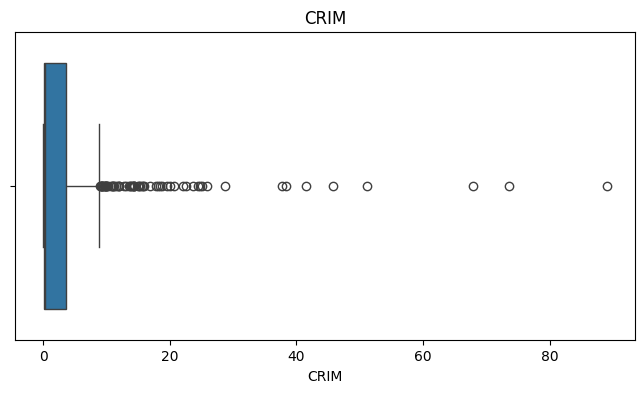

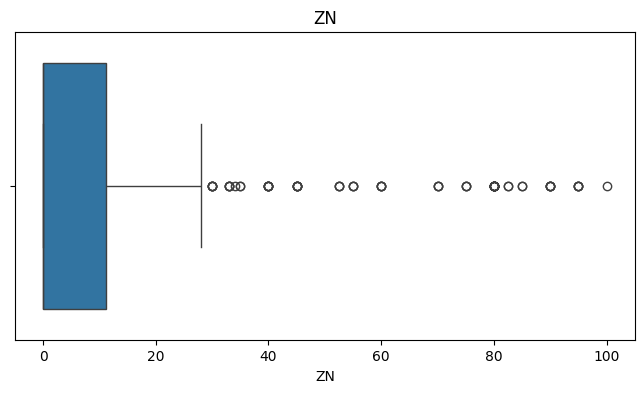

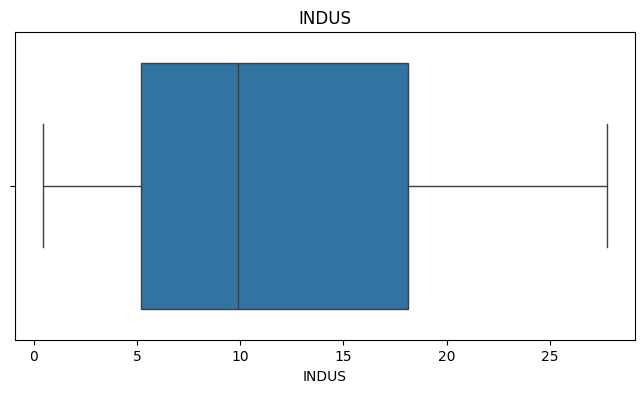

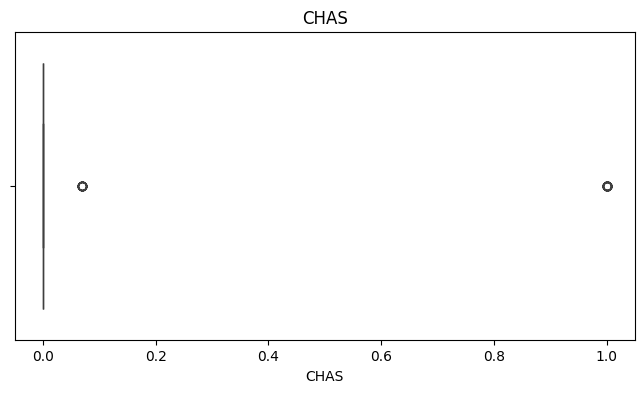

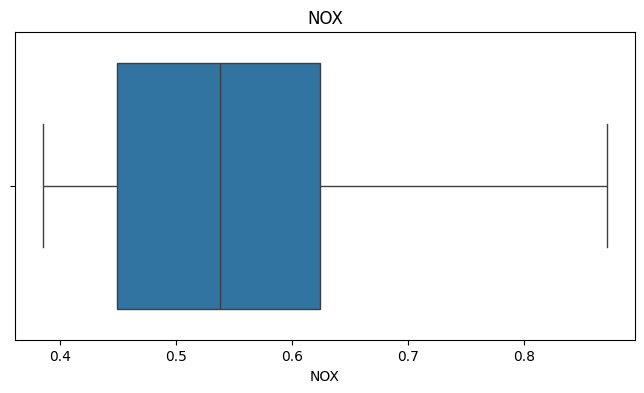

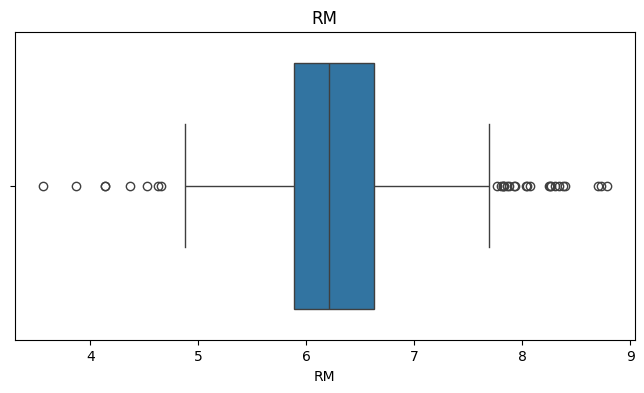

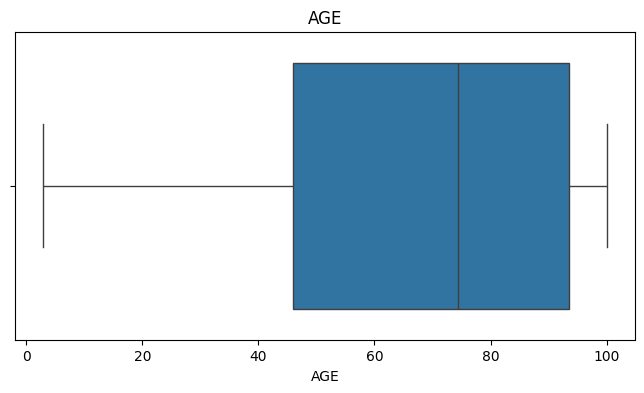

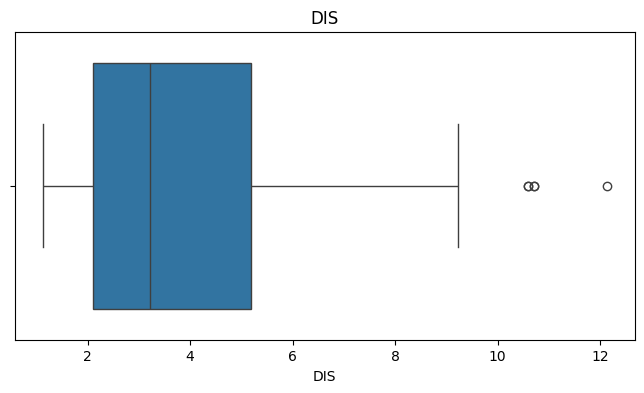

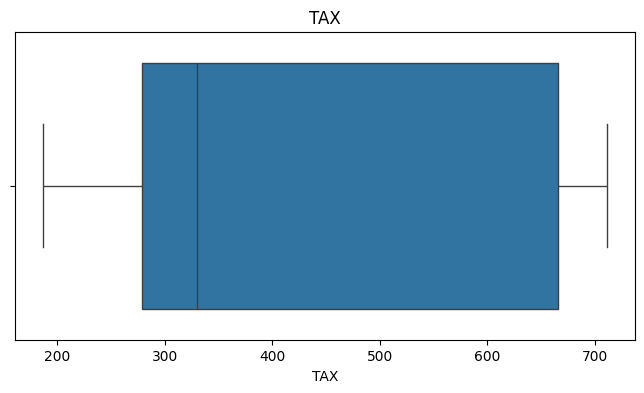

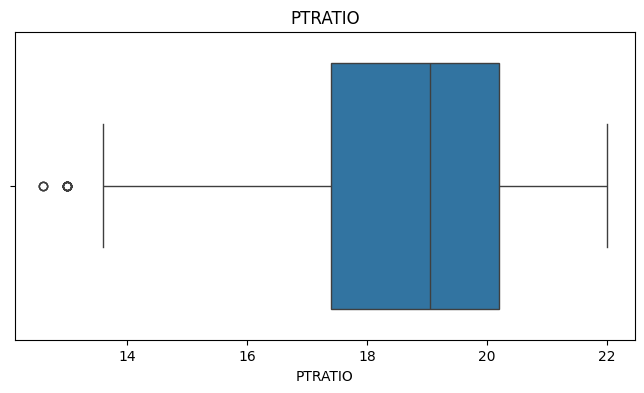

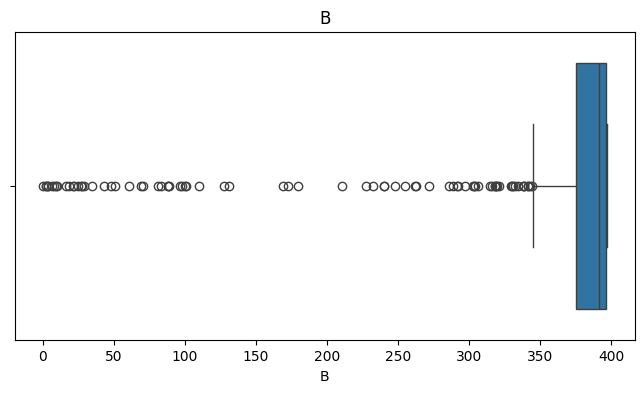

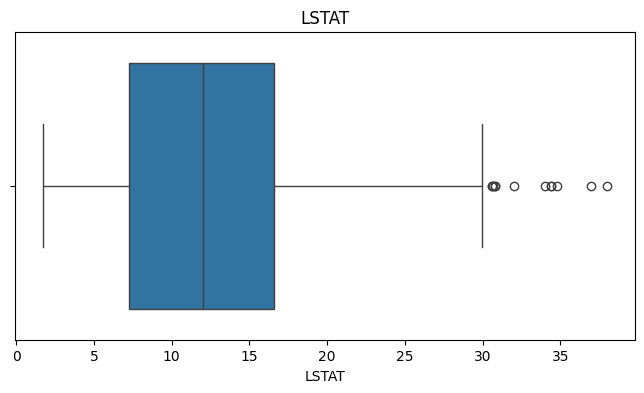

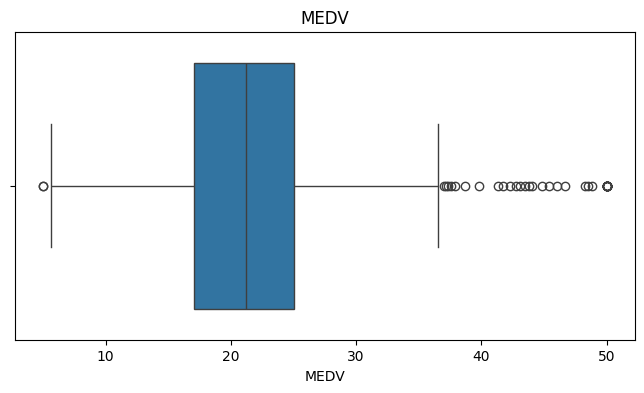

In [38]:
import seaborn as sns
from matplotlib import pyplot as plt

for column in data.columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=data[column])
    plt.title(column)
    plt.show()

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


add polynomial features to increase model complexity!



In [39]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X_scaled)


Extract the target column from the previously mentioned DataFrame and transform it into a new NumPy array, named y.

In [40]:
y = data['MEDV'].values
y

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 18.7, 16. , 22.2, 25. , 33. , 23.5,
       19.4, 22. , 17.4, 20.9, 24.2, 21.7, 22.8, 23.4, 24.1, 21.4, 20. ,
       20.8, 21.2, 20.3, 28. , 23.9, 24.8, 22.9, 23.9, 26.6, 22.5, 22.2,
       23.6, 28.7, 22.6, 22. , 22.9, 25. , 20.6, 28.4, 21.4, 38.7, 43.8,
       33.2, 27.5, 26.5, 18.6, 19.3, 20.1, 19.5, 19.5, 20.4, 19.8, 19.4,
       21.7, 22.8, 18.8, 18.7, 18.5, 18.3, 21.2, 19.2, 20.4, 19.3, 22. ,
       20.3, 20.5, 17.3, 18.8, 21.4, 15.7, 16.2, 18. , 14.3, 19.2, 19.6,
       23. , 18.4, 15.6, 18.1, 17.4, 17.1, 13.3, 17.8, 14. , 14.4, 13.4,
       15.6, 11.8, 13.8, 15.6, 14.6, 17.8, 15.4, 21



Split the dataset into two parts such that the training set contains 80% of the samples.

In [41]:
# TODO: Split the dataset into two parts such that the training set contains 80% of the samples.
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

# Training


Fit a linear regressor to the data. (Use sklearn)


In [42]:
# TODO: Use sklearn
linear_regressor = LinearRegression()
linear_regressor.fit(X_train, y_train)


LinearRegression()

Get the coefficients of the variables and visualize it

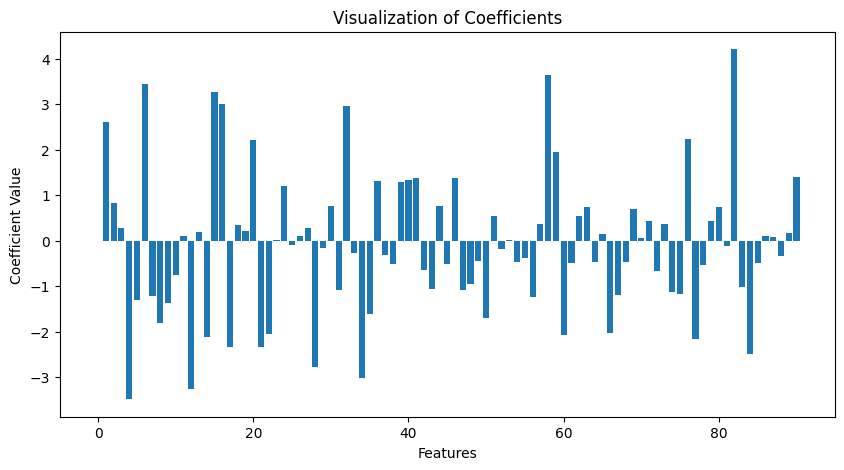

In [43]:
coefficients = linear_regressor.coef_
plt.figure(figsize=(10, 5))
plt.bar(range(len(coefficients)), coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Visualization of Coefficients')
plt.show()

Get the score value of sklearn regressor on train dataset</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)



In [44]:
y_train_pred = linear_regressor.predict(X_train)
r2 = r2_score(y_train, y_train_pred)
mse = mean_squared_error(y_train, y_train_pred)

print(f"R-squared for the training set: {r2:.5f}")
print(f"Mean Squared Error for the training set: {mse:.5f}")


R-squared for the training set: 0.92336
Mean Squared Error for the training set: 6.65784


Predict the value of "y" for each "x" belonging to the "testing" set

In [45]:
y_test_pred = linear_regressor.predict(X_test)
test_r2 = r2_score(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)

print(f"R-squared for the testing set: {test_r2:.5f}")
print(f"Mean Squared Error for the testing set: {test_mse:.5f}")


R-squared for the testing set: 0.75288
Mean Squared Error for the testing set: 18.12208


# Lasso Regularization(L1)

L1 regularization, also known as Lasso (Least Absolute Shrinkage and Selection Operator) regularization, is a technique used in regression models that encourages simplicity and sparsity in the model coefficients. This is achieved by adding a penalty equal to the absolute value of the magnitude of coefficients to the loss function.\
</br>
Train a regression model using L1 regularization.

In [46]:
# TODO: Use Lasso from sklearn library
lasso_regressor = Lasso(alpha=0.5)
lasso_regressor.fit(X_train, y_train)

Lasso(alpha=0.5)

Get the coefficients of the variables and visualize it.

[ 0.         -0.          0.         -0.          0.         -0.
  2.71044561 -0.         -0.         -0.17551806 -0.87919831  0.
 -3.61571562 -0.09172222  0.         -0.          0.         -0.
  0.         -0.          0.         -0.         -0.         -0.
 -0.          0.          0.          0.          0.          0.
 -0.         -0.          0.          0.         -0.         -0.
  0.          0.         -0.         -0.          0.          0.
  0.         -0.          0.         -0.          0.21657471 -0.
 -0.          0.         -0.          0.09712834  0.          0.
 -0.         -0.20798319 -0.1485112  -0.          0.         -0.
 -0.          0.         -0.          0.7562266  -0.          0.
 -0.85199921 -0.59720675  0.         -0.          0.          0.
 -0.         -0.         -0.         -0.         -0.          0.
  0.         -0.          0.26961623  0.          0.         -0.
 -0.8353172   0.         -0.         -0.         -0.24304235 -0.
  0.46962857]


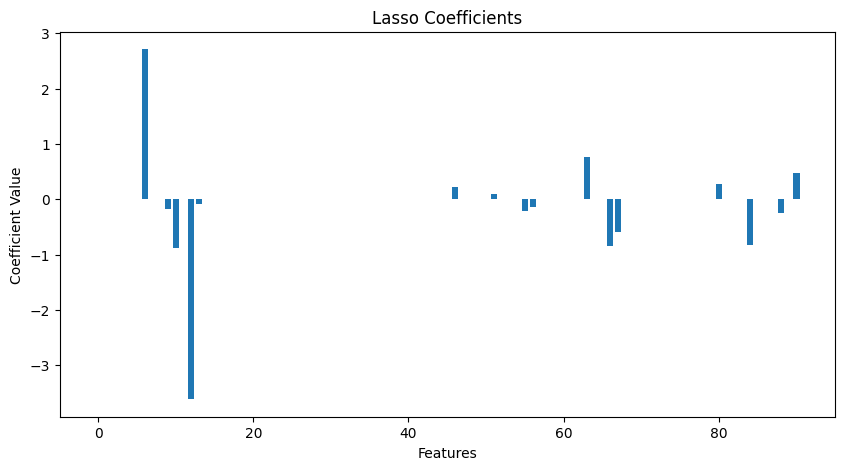

In [47]:
lasso_coefficients = lasso_regressor.coef_
print(lasso_coefficients)
plt.figure(figsize=(10, 5))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.show()

1- What observations can you make about the weight distribution when applying L1 regularization?

2- How do different values of the regularization parameter (alpha) affect the sparsity of the model coefficients?

[ 0.         -0.          0.         -0.          0.         -0.
  1.95935355 -0.          0.         -0.         -0.15511826  0.
 -2.85542302 -0.10761952  0.         -0.          0.         -0.
 -0.         -0.          0.         -0.         -0.          0.
 -0.          0.         -0.          0.         -0.          0.
 -0.          0.          0.         -0.          0.         -0.
  0.          0.         -0.         -0.         -0.          0.
 -0.          0.          0.         -0.          0.16217862 -0.
 -0.          0.         -0.          0.          0.          0.
 -0.         -0.         -0.         -0.          0.         -0.
 -0.          0.         -0.          0.9623876  -0.          0.
 -0.         -0.30281826  0.         -0.          0.          0.
 -0.         -0.          0.         -0.         -0.          0.
  0.         -0.          0.         -0.          0.          0.
 -0.          0.         -0.          0.         -0.31411091  0.
  0.        ]


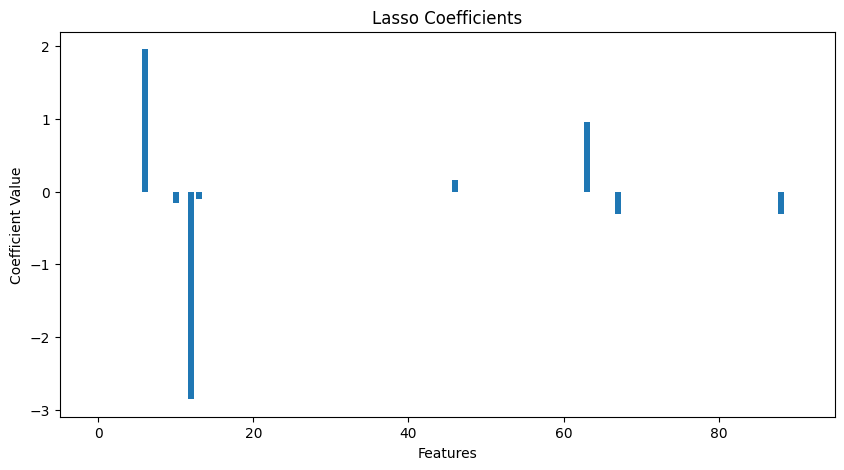

In [49]:
lasso_regressor = Lasso(alpha=2)
lasso_regressor.fit(X_train, y_train)
lasso_coefficients = lasso_regressor.coef_
print(lasso_coefficients)
plt.figure(figsize=(10, 5))
plt.bar(range(len(lasso_coefficients)), lasso_coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Lasso Coefficients')
plt.show()

**1.sparsity**: L1 regularization tends to produce a sparse model where several coefficients can become exactly zero. This indicates that the model is ignoring some features entirely, possibly because they are not informative with respect to the target variable.

  **2.Alpha and Sparsity**: The alpha parameter controls the strength of the regularization. Higher values of alpha increase the number of zero coefficients, promoting a simpler, sparser model.





Get the score value on train *dataset*


In [50]:
y_train_pred_lasso = lasso_regressor.predict(X_train)
r2_lasso_train = r2_score(y_train, y_train_pred_lasso)
mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)

# Print scores
print(f"Lasso R-squared on Training Data: {r2_lasso_train:.5f}")
print(f"Lasso MSE on Training Data: {mse_lasso_train:.5f}")


Lasso R-squared on Training Data: 0.70004
Lasso MSE on Training Data: 26.05866


Predict the value of "y" for each "x" belonging to the "testing" set

In [51]:
y_test_pred_lasso = lasso_regressor.predict(X_test)
y_test_pred_lasso

array([23.79647897, 29.58882072, 18.86551651, 24.12207396, 19.80689491,
       22.03337131, 18.6770545 , 16.65227341, 21.41686077, 20.45080465,
       21.11987607, 19.36196357,  8.21018871, 21.73606943, 21.21736736,
       24.29620136, 18.96619754, 14.59824138, 36.64842554, 19.12615447,
       21.5831111 , 24.68614842, 16.90351175, 22.43337982, 19.85280094,
       18.76686515, 20.90021709, 16.01343455, 21.39795627, 20.26974013,
       19.77990902, 24.28021162, 25.51061119, 22.08215544, 17.60087625,
       19.07499543, 29.5247349 , 22.0965764 , 22.66546644, 21.60338939,
       17.42602113, 26.03295267, 38.17860149, 20.59314092, 23.78499922,
       19.04642916, 18.63584569, 24.51986332, 19.88721936, 26.24836864,
       20.91989106, 28.59610384, 18.80625119, 25.2222264 , 33.36416173,
       22.56659267, 19.85887829, 27.65565385, 23.28185603, 18.42668824,
       24.59689958, 29.59156905, 26.43841907, 21.29109524, 25.72180258,
       18.83847393, 20.30890427, 24.16332893, 26.21239225, 14.00

# Ridge Regularization(L2)

L2 regularization, also known as Ridge regularization, is a technique used in regression models to prevent overfitting by adding a penalty equivalent to the square of the magnitude of coefficients to the loss function.
</br>
Train a regression model using L2 regularization.

In [52]:
# TODO: Use Ridge from sklearn library
ridge_regressor = Ridge(alpha=10)
ridge_regressor.fit(X_train, y_train)

Ridge(alpha=10)

Get the coefficients of the variables and visualize it.

[ 0.          0.05912156  0.51116396 -0.28467561 -0.32455353 -0.85827735
  3.30888276 -1.15903729 -1.59593251 -0.53180157 -0.91042787  0.42828162
 -2.94077889  0.16087076 -0.2517118   0.62754054  1.60530016 -1.09008989
  0.19857273 -0.21466179  0.91315274 -0.33329639 -0.37069977 -0.0685445
  0.53227529  0.13451302  0.04174477  0.21402759 -0.19753069 -0.13818418
  0.11128147 -0.41118718  0.69356948 -0.05349153 -0.33153368 -0.6523907
  0.65774546  0.00626011  0.17510478  0.56882038  0.84405893  0.75253857
 -0.01735362 -0.74138428  0.38541275 -0.84892644  0.44774634 -0.95605317
 -0.87633987 -0.11780543 -0.84245313  0.77371237 -0.05986682 -0.05282303
 -0.5612907  -0.35054369 -1.10824908 -0.28920456  0.95796985  0.161939
 -0.72743981 -0.23024552  0.59678367  0.61007814 -0.35547651  0.25507285
 -1.39082276 -1.30777268 -0.34506817  0.43935663  0.18768566  0.33640313
  0.12071674  0.17082987 -0.88889616 -0.93434533  1.1011708  -0.55229718
 -0.01954442 -0.25679014  0.78714857  0.62433033  1.952

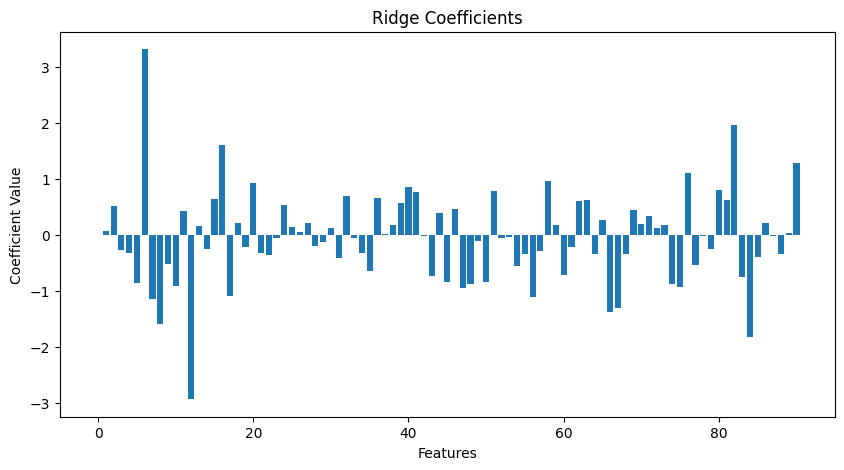

In [53]:
ridge_coefficients = ridge_regressor.coef_
print(ridge_coefficients)
plt.figure(figsize=(10, 5))
plt.bar(range(len(ridge_coefficients)), ridge_coefficients)
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.title('Ridge Coefficients')
plt.show()

Compare the effect on coefficients between L1 and L2 regularization. What are the key differences?

 How does the regularization parameter influence the magnitude of the coefficients in Ridge Regression?

**1.Coefficient Shrinkage**: Both L1 and L2 reduce the magnitudes of the coefficients, but L1 can reduce some coefficients to zero while L2 tends to shrink coefficients more uniformly.



**2.Regularization Parameter Influence on L2**: Increasing the alpha in Ridge regression does not lead to coefficients becoming zero but does shrink them closer to zero. This makes Ridge useful for reducing model complexity and multicollinearity but without completely eliminating the influence of less important features.

Get the score value on train *dataset*

In [29]:
y_train_pred_ridge = ridge_regressor.predict(X_train)
r2_ridge_train = r2_score(y_train, y_train_pred_ridge)
mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)

print(f"Ridge R-squared on Training Data: {r2_ridge_train:.5f}")
print(f"Ridge MSE on Training Data: {mse_ridge_train:.5f}")

Ridge R-squared on Training Data: 0.91439
Ridge MSE on Training Data: 7.43688


Predict the value of "y" for each "x" belonging to the "testing" set



In [30]:
y_test_pred_ridge = ridge_regressor.predict(X_test)
print(y_test_pred_ridge)

[26.64874045 37.58387034 19.27657644 21.94197185 15.3028101  20.12028532
 19.06550135 13.09220054 21.53629599 19.59853597 19.98066811 17.71773856
  7.45618135 19.4698435  17.83085991 22.41342776 19.03460611 10.83733093
 47.87734976 13.23733086 25.94978663 28.67626209 15.62739061 20.87266644
 16.88618107 16.70243714 18.15202381 12.99400863 19.06044753 19.1619615
 18.49185044 23.96483655 16.81029968 24.22140047 14.71608764 17.14764076
 33.00621736 20.36005585 21.56765845 22.00579786 16.87716829 30.83029389
 52.86535583 16.40416721 26.70438602 16.00962769 15.37456958 24.22203195
 18.0413712  28.35774744 18.65466298 33.07812494 17.01116837 25.34703163
 43.22198358 23.00525594 14.66623572 32.34427145 25.00498764 14.21572885
 24.95594853 33.4162596  30.78344757 16.16942493 25.19231399 16.02456508
 14.58662856 24.41159615 30.32473275 12.3838725  20.94435871 27.5999913
 10.37505112 21.25995733 20.86051995  5.76335445 20.67914828 49.65506758
 11.15867412 13.79119622 19.12026295 12.02135127 17.9

# Summarization

Summarize the performance metrics (e.g., RMSE, R² score) of the basic regression model, Lasso regression, and Ridge regression in a table for easy comparison.(On both test and train data)</br>
if you are not familiar with R-squared concept see the link below:
[R-squared](https://statisticsbyjim.com/regression/interpret-r-squared-regression/)


In [32]:
import numpy as np
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score

mse_linear_train = mean_squared_error(y_train, y_train_pred)
rmse_linear_train = np.sqrt(mse_linear_train)
mse_linear_test = mean_squared_error(y_test, y_test_pred)
rmse_linear_test = np.sqrt(mse_linear_test)

mse_lasso_train = mean_squared_error(y_train, y_train_pred_lasso)
rmse_lasso_train = np.sqrt(mse_lasso_train)
mse_lasso_test = mean_squared_error(y_test, y_test_pred_lasso)
rmse_lasso_test = np.sqrt(mse_lasso_test)

mse_ridge_train = mean_squared_error(y_train, y_train_pred_ridge)
rmse_ridge_train = np.sqrt(mse_ridge_train)
mse_ridge_test = mean_squared_error(y_test, y_test_pred_ridge)
rmse_ridge_test = np.sqrt(mse_ridge_test)

results_df = pd.DataFrame({
    'Model': ['Linear Regression', 'Lasso Regression', 'Ridge Regression'],
    'R² Training': [r2_score(y_train, y_train_pred), r2_score(y_train, y_train_pred_lasso), r2_score(y_train, y_train_pred_ridge)],
    'MSE Training': [mse_linear_train, mse_lasso_train, mse_ridge_train],
    'RMSE Training': [rmse_linear_train, rmse_lasso_train, rmse_ridge_train],
    'R² Testing': [r2_score(y_test, y_test_pred), r2_score(y_test, y_test_pred_lasso), r2_score(y_test, y_test_pred_ridge)],
    'MSE Testing': [mse_linear_test, mse_lasso_test, mse_ridge_test],
    'RMSE Testing': [rmse_linear_test, rmse_lasso_test, rmse_ridge_test]
})

print(results_df)



               Model  R² Training  MSE Training  RMSE Training  R² Testing  \
0  Linear Regression     0.923362      6.657839       2.580279    0.752882   
1   Lasso Regression     0.817129     15.886655       3.985807    0.778718   
2   Ridge Regression     0.914394      7.436880       2.727064    0.793955   

   MSE Testing  RMSE Testing  
0    18.122077      4.257003  
1    16.227427      4.028328  
2    15.110037      3.887163  


*Which model performed best on the test data?*


To determine this, we would look at the 'R² Testing' and 'RMSE Testing' columns in the DataFrame. The model with the highest R² and the lowest RMSE on testing data is typically considered to have performed the best.


*Why are the results on train data different from test data?*


Training data is used to fit the models, so models might overfit on this data, especially if they are complex (like the polynomial features used with the basic regression model). Overfitting means the model is too closely fit to the training data, capturing noise and details that do not generalize to new data. On the other hand, test data serves as a more unbiased evaluation of model effectiveness on unseen data.


*Discuss why this might be the case.*

**Basic Regression**: Might overfit, especially with many features or polynomial terms, leading to higher performance on training data but worse on test data.


**Lasso (L1)**: Adds sparsity by reducing some coefficients to zero, which can help in removing less important features and prevent overfitting. This often results in better generalization but potentially less fit on the training data.


**Ridge (L2)**: Reduces overfitting by shrinking coefficients but doesn't set them to zero. It generally maintains good performance on both training and testing sets but may not handle irrelevant features as well as Lasso.


        